In [1]:
%cd transformers
!pip install .

C:\Users\alexd\Desktop\transformers\transformers
Processing c:\users\alexd\desktop\transformers\transformers
  Created wheel for transformers: filename=transformers-3.1.0-py3-none-any.whl size=919071 sha256=c6e29b4974999c2a648b7230d67daadade99fa44042938f303c76f2d50bffde1
  Stored in directory: C:\Users\alexd\AppData\Local\Temp\pip-ephem-wheel-cache-rg663l0j\wheels\03\15\49\db7f989c5b6aaa048ab9b571846906a144e9e47075b6e1c3a3
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 3.1.0
    Uninstalling transformers-3.1.0:
      Successfully uninstalled transformers-3.1.0


In [2]:
import importlib
import transformers
importlib.reload(transformers)


<module 'transformers' from 'C:\\Users\\alexd\\Anaconda3\\envs\\transformers\\lib\\site-packages\\transformers\\__init__.py'>

In [3]:
%load_ext autoreload
%autoreload transformers


In [46]:
len(batch['input_ids'][0])

55

In [5]:
import torch
import numpy as np

In [6]:
model

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(96103, 1024, padding_idx=0)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(96103, 1024, padding_idx=0)
      (embed_positions): SinusoidalPositionalEmbedding(512, 1024)
      (layers): ModuleList(
        (0): EncoderLayer(
          (self_attn): Attention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
   

In [4]:
tokenizer = transformers.AutoTokenizer.from_pretrained("google/pegasus-xsum")
model = transformers.AutoModelWithLMHead.from_pretrained("google/pegasus-xsum")

C:\Users\alexd\Anaconda3\envs\transformers\lib\site-packages\transformers\modeling_auto.py:828: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
Some weights of BartForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [88]:
print(np.argmax(translated[0][0][24].detach()))
print(max(translated[0][0][24]))

tensor(110)
tensor(12.5624, grad_fn=<SelectBackward>)


In [87]:
translated[0][0][53][110]

tensor(13.2011, grad_fn=<SelectBackward>)

In [454]:
print(len(translated))
print(translated[0].size())#.size())
print(translated[1][0].size())
print(translated[2].size())
print(translated[3][0].size())

4
torch.Size([1, 273, 96103])
torch.Size([1, 16, 273, 273])
torch.Size([1, 273, 1024])
torch.Size([1, 16, 273, 273])


In [29]:
src_text = ["""PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow. """
]
""" Severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2) is the novel coronavirus first detected in Wuhan, China, in November2019, that causes coronavirus disease 2019 (COVID-19). On March 11th 2020, the World Health Organization declared COVID-19 a pandemic. A growing body of evidence reveals that male sex is a risk factor for a more severe disease, including death. Globally, ~60% of deaths from COVID-19 are reported in men, and a cohort study of 17 million adults in England reported a strong association between male sex and risk of death from COVID-19 (hazard ratio 1.59, 95% confidence interval 1.53-1.65).
    Past studies have demonstrated that sex has a significant impact on the outcome of infections and has been associated with underlying differences in immune response to infection9,10. For example, prevalence of
hepatitis A and tuberculosis are significantly higher in men compared
with women11. Viral loads are consistently higher in male patients with
hepatitis C virus (HCV) and human immunodeficiency virus (HIV).
Conversely, women mount a more robust immune response to vaccines14. These findings collectively suggest a more robust ability among
women to control infectious agents. However, the mechanism by which
SARS-CoV-2 causes more severe disease in male patients than in female
patients remains unknown.
To elucidate the immune responses against SARS-CoV-2 infection in
men and women, we performed detailed analysis on the sex differences
in immune phenotype via the assessment of viral loads, SARS-CoV-2
specific antibody levels, plasma cytokines/chemokines, and blood
cell phenotypes.
"""


torch_device = 'cpu'#'cpu'#cuda
abatch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest').to(torch_device)
model = model.to(torch_device)
#translated =  model.generate(**abatch)
translated = model(**abatch, output_attentions=True, return_dict = True)
#tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)


In [510]:
src_text

['PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow. ']

In [409]:
abatch

{'input_ids': tensor([[14887,   759,  1005,  3163,   126,  2798,   109, 25690,   116,   115,
          1407,   112, 13378,   118,   281,  7213, 10754,  1514,  1047,   107,
           139,  2560,   117,   112,  1329,   109,   887,   113, 39471,   107,
         16502,  6194,  4927,   527,   195,  2798,   112,   129,  2790,   141,
           109, 87338,   116,   162,   195,  1214,   112,   289,   224,   134,
           583, 26568,  3469,   107,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [27]:
src_text = [
    """ Severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2) is the novel coronavirus first detected in Wuhan, China, in November2019, that causes coronavirus disease 2019 (COVID-19). On March 11th 2020, the World Health Organization declared COVID-19 a pandemic. A growing body of evidence reveals that male sex is a risk factor for a more severe disease, including death. Globally, ~60% of deaths from COVID-19 are reported in men, and a cohort study of 17 million adults in England reported a strong association between male sex and risk of death from COVID-19 (hazard ratio 1.59, 95% confidence interval 1.53-1.65).
    Past studies have demonstrated that sex has a significant impact on the outcome of infections and has been associated with underlying differences in immune response to infection9,10. For example, prevalence of
hepatitis A and tuberculosis are significantly higher in men compared
with women11. Viral loads are consistently higher in male patients with
hepatitis C virus (HCV) and human immunodeficiency virus (HIV).
Conversely, women mount a more robust immune response to vaccines14. These findings collectively suggest a more robust ability among
women to control infectious agents. However, the mechanism by which
SARS-CoV-2 causes more severe disease in male patients than in female
patients remains unknown."""]
"""
To elucidate the immune responses against SARS-CoV-2 infection in
men and women, we performed detailed analysis on the sex differences
in immune phenotype via the assessment of viral loads, SARS-CoV-2
specific antibody levels, plasma cytokines/chemokines, and blood
cell phenotypes.
"""
#]

torch_device = 'cpu'#'cpu'#cuda
# only run this cell if you actually want to generate a sequence
model = model.to(torch_device)
abatch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest').to(torch_device)
translated, decoder_attentions =  model.generate(**abatch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=False)


In [37]:
print(len(decoder_attentions))
print(decoder_attentions[24][15].size())
print(len(translated[0]))

25
torch.Size([8, 16, 1, 25])
24


In [40]:
model.config.is_encoder_decoder

True

In [ ]:
model_inputs = decoder_attentions
pickle.dump( model_inputs, open( "model_inputs.p", "wb" ) )

In [108]:
n = 5
print(len(decoder_attentions[n]['past_key_values'][0]['encoder_decoder']['prev_key']))
#print(len(decoder_attentions[n]['past_key_values'][0]['self']['prev_key'][7]))
print(decoder_attentions[n]['past_key_values'][0]['self']['prev_key'][0].size())
print(len(decoder_attentions[n]['past_key_values']))
print(decoder_attentions[n]['past_key_values'][15]['self'])
decoder_attentions[n]['past_key_values'][0]['encoder_decoder'].keys()

8
torch.Size([16, 6, 64])
16


dict_keys(['prev_key', 'prev_value', 'prev_key_padding_mask'])

In [112]:
print(len(decoder_attentions[0]['encoder_outputs']))
print(decoder_attentions[0]['encoder_outputs'][0].size())
print(decoder_attentions[0]['encoder_outputs'][0])

1
torch.Size([8, 313, 1024])
tensor([[[-0.2185, -0.2483, -0.1006,  ..., -0.0291,  0.0752,  0.4353],
         [-0.1739, -0.2278, -0.1350,  ..., -0.0976, -0.0049,  0.4503],
         [-0.0544, -0.1423, -0.1556,  ..., -0.1533,  0.0321,  0.1555],
         ...,
         [-0.0695,  0.1026, -0.0517,  ...,  0.0012, -0.0325, -0.0994],
         [ 0.2312,  0.0439, -0.2436,  ..., -0.0116, -0.1114, -0.0070],
         [-0.1488, -0.0327, -0.1204,  ...,  0.0529,  0.1198,  0.0258]],

        [[-0.2185, -0.2483, -0.1006,  ..., -0.0291,  0.0752,  0.4353],
         [-0.1739, -0.2278, -0.1350,  ..., -0.0976, -0.0049,  0.4503],
         [-0.0544, -0.1423, -0.1556,  ..., -0.1533,  0.0321,  0.1555],
         ...,
         [-0.0695,  0.1026, -0.0517,  ...,  0.0012, -0.0325, -0.0994],
         [ 0.2312,  0.0439, -0.2436,  ..., -0.0116, -0.1114, -0.0070],
         [-0.1488, -0.0327, -0.1204,  ...,  0.0529,  0.1198,  0.0258]],

        [[-0.2185, -0.2483, -0.1006,  ..., -0.0291,  0.0752,  0.4353],
         [-0.173

In [69]:
decoder_attentions[0][15].size()

torch.Size([8, 16, 1, 1])

In [ ]:
print(translated)
tokenizer.batch_decode(translated, skip_special_tokens=False)

In [37]:
print(translated['decoder_attentions'][0].size())


torch.Size([1, 16, 55, 55])


In [29]:
tokenizer.batch_decode(translated, skip_special_tokens=True)


['The mechanism by which SARS-CoV-2 causes more severe disease in male patients than in female patients remains unknown.']

# Vis

In [430]:
abatch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest').to(torch_device)


In [513]:
tokens = tokenizer.convert_ids_to_tokens(abatch['input_ids'][0])

In [ ]:
tokens

# With Self Attentions

In [515]:
import matplotlib.pyplot as plt
from scipy.special import softmax


In [ ]:
translated['decoder_attentions'][15][0].size()

In [516]:
#convert to list
encoder_attentions = translated[1]
encoder_attentions = [each for each in encoder_attentions]
head_sums = []
for l, layer in enumerate(encoder_attentions): # 16
    for b, batch in enumerate(layer): #1
        layers = []
        for h, head in enumerate(batch): # 16
            layers.append(torch.sum(head, dim = 0).detach().numpy())
            #layers.append(np.sum(softmax(head.detach().numpy()), axis = 0))
        head_sums.append(layers)
layer_sums = [np.array(layer).sum(axis = 0) for layer in head_sums]
final_layer_sum = layer_sums[-1]
total_sum = np.array(layer_sums).sum(axis = 0)
#total_prod = np.array(layer_sums).prod(axis = 0)

In [ ]:
final_layer_sum

In [ ]:
head_sums[-1]

In [ ]:
for each in head_sums[-1]:
    print (each)

In [ ]:
len(encoder_attentions[15][0][15])

In [ ]:
#plt.clf()
#plt.figure()
plots = []
for i, head in enumerate(head_sums[-1]):
    plt.clf()
    plt.figure()
    #plots.append(plt.bar(range(len(head)), head))
    plt.bar(range(len(head)), head)
    plt.xticks(range(len(head)), tokens, rotation=90)
    plt.rcParams["figure.figsize"] = (100,60)
    #plt.legend([bar[0] for bar in plots], [i+1 for i in range(17)])
    plt.savefig(f'decoder16head{i+1}.jpg')
    #plt.show()

<Figure size 7200x4320 with 0 Axes>

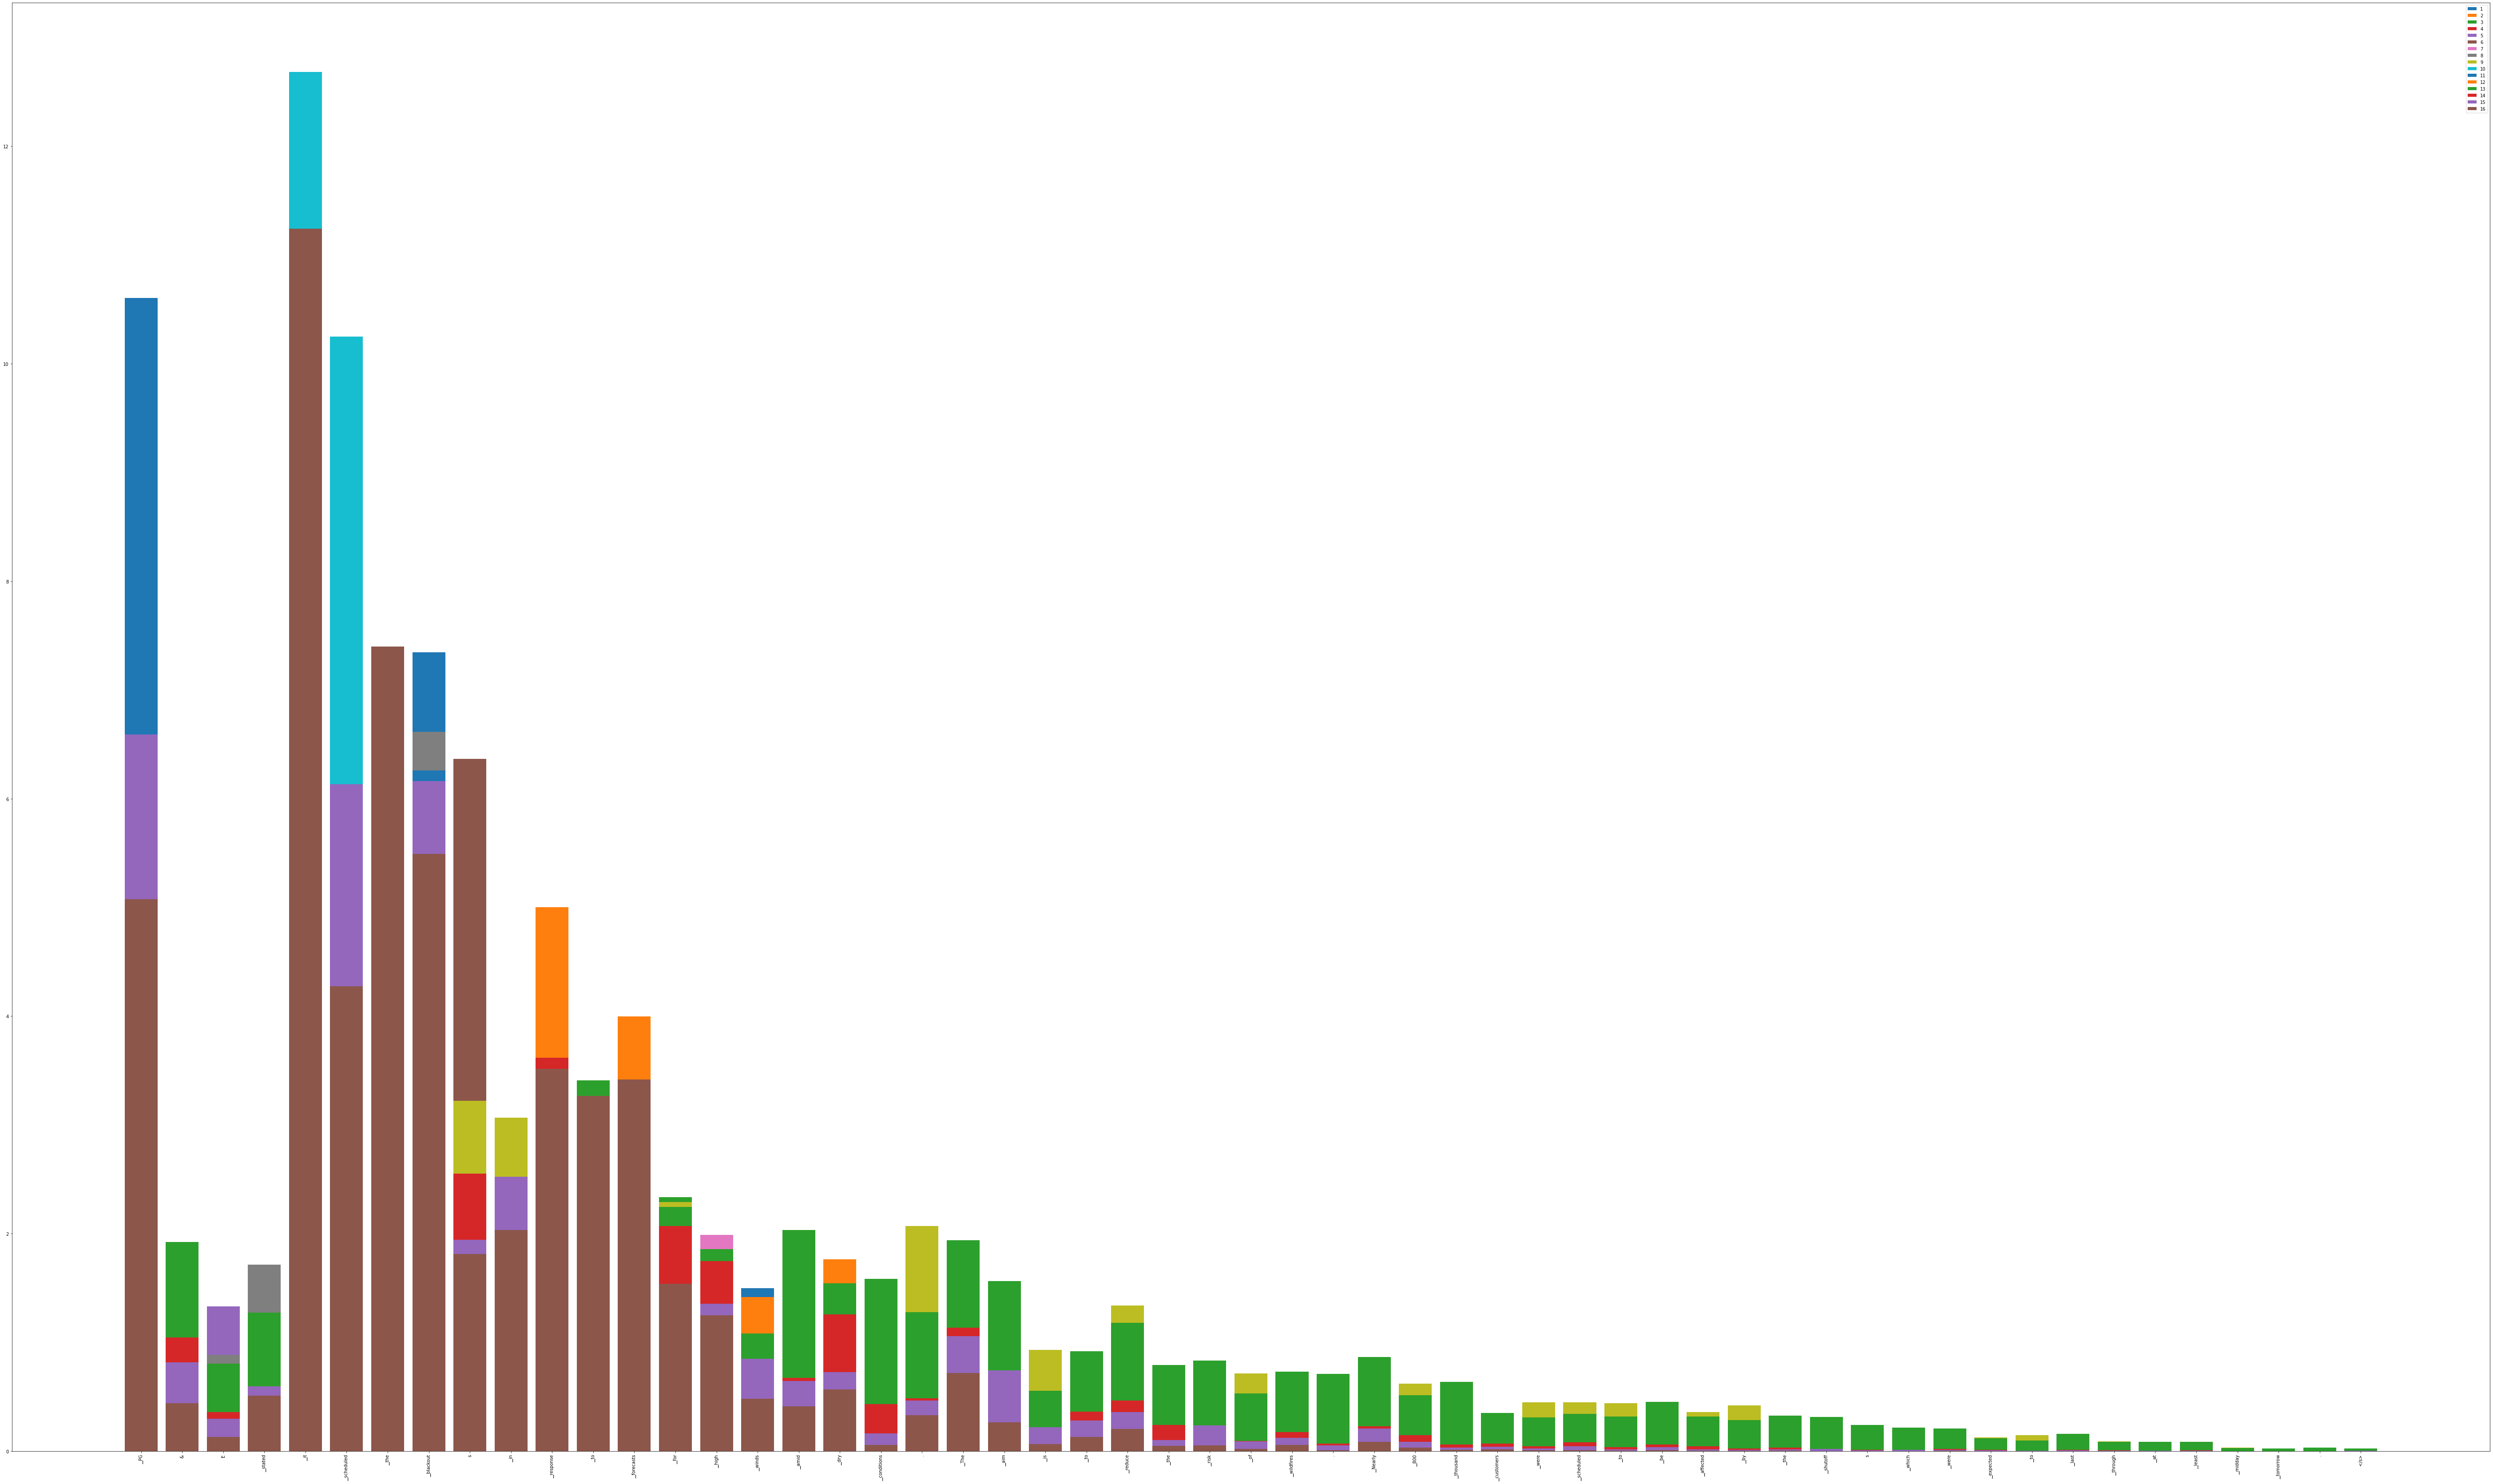

In [518]:
plt.clf()
plt.figure()
plots = []
for i, head in enumerate(head_sums[-1]):
    plots.append(plt.bar(range(len(head)), head))
plt.xticks(range(len(head)), tokens, rotation=90)
plt.rcParams["figure.figsize"] = (100,60)
plt.legend([bar[0] for bar in plots], [i+1 for i in range(17)])
plt.savefig('decoder16headsums1.jpg')
plt.show()

<Figure size 7200x4320 with 0 Axes>

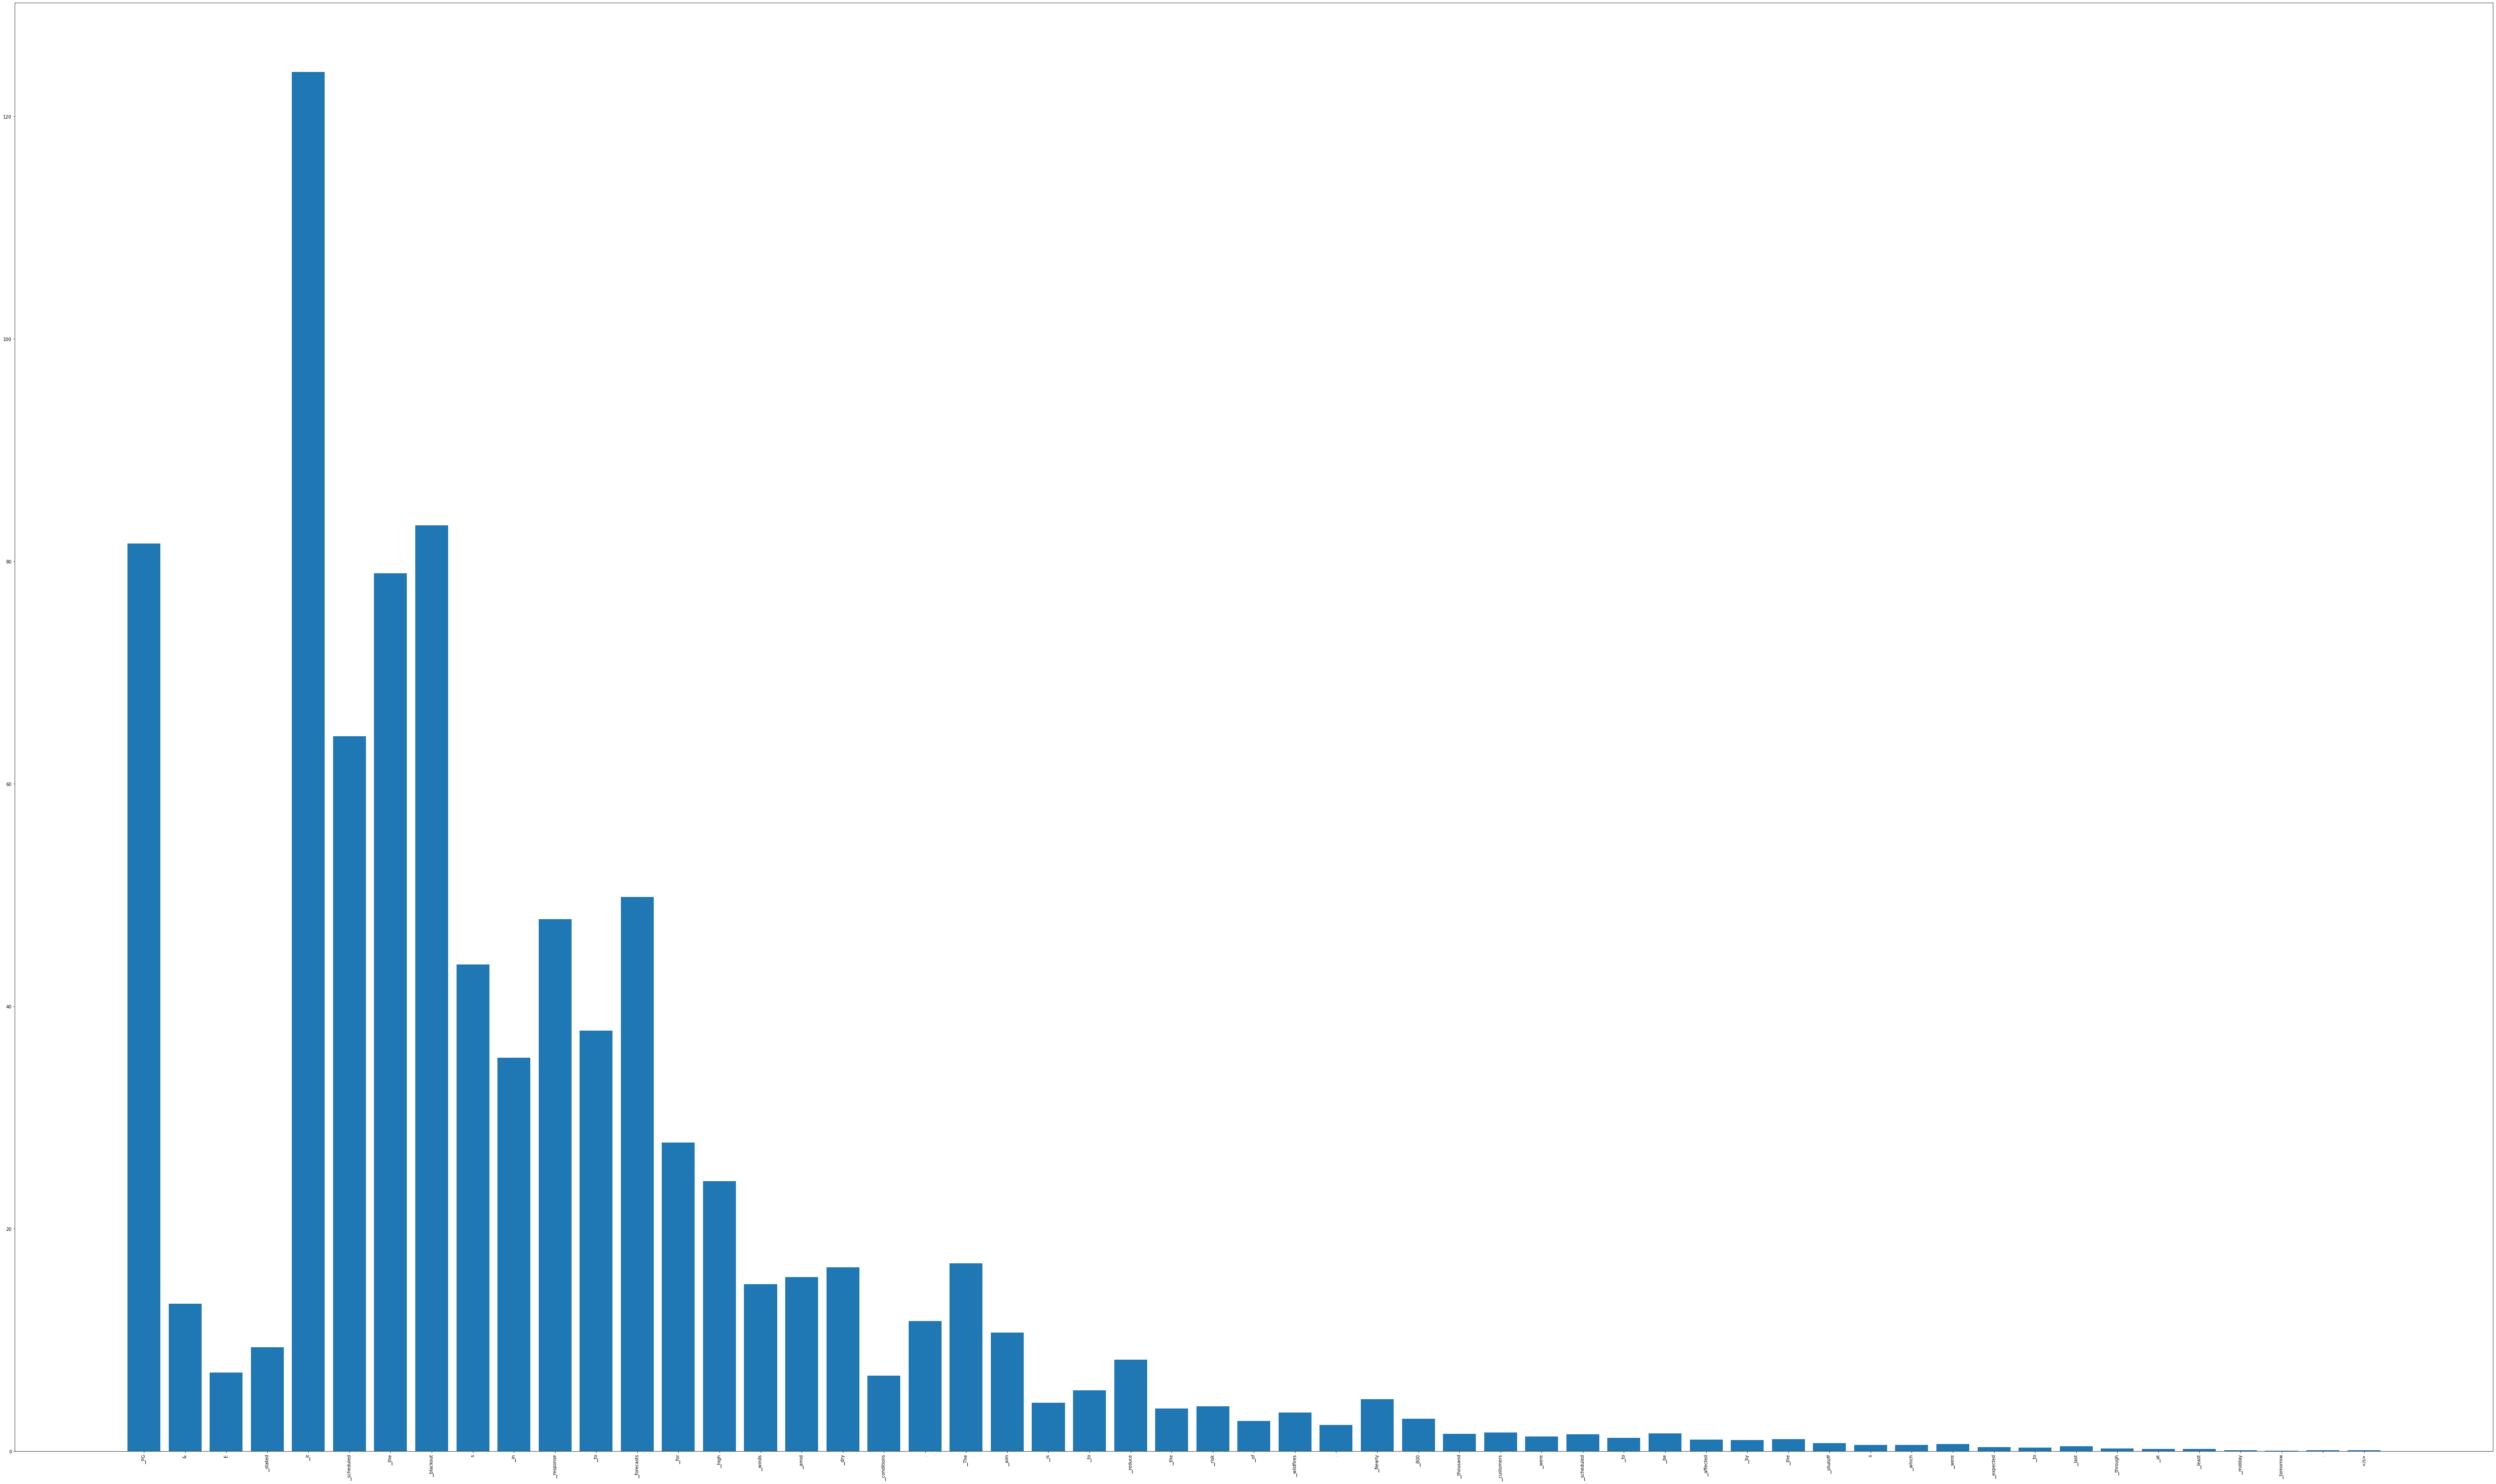

In [517]:
plt.clf()
plt.figure()
#plots = []
#for i, head in enumerate(head_sums[-1]):
#    plots.append(plt.bar(range(len(head)), head))
plt.bar(range(len(head)), final_layer_sum)
plt.xticks(range(len(head)), tokens, rotation=90)
plt.rcParams["figure.figsize"] = (100,60)
#plt.legend([bar[0] for bar in plots], [i+1 for i in range(17)])
#plt.savefig('decoder16headsums1.jpg')
plt.show()

In [102]:
import pickle

In [ ]:
pickle.dump( translated, open( "outputs.p", "wb" ) )

In [482]:
plt.clf()

<Figure size 7200x7200 with 0 Axes>

In [488]:
plt.savefig('decoder16headsums.jpg')

<Figure size 7200x4320 with 0 Axes>

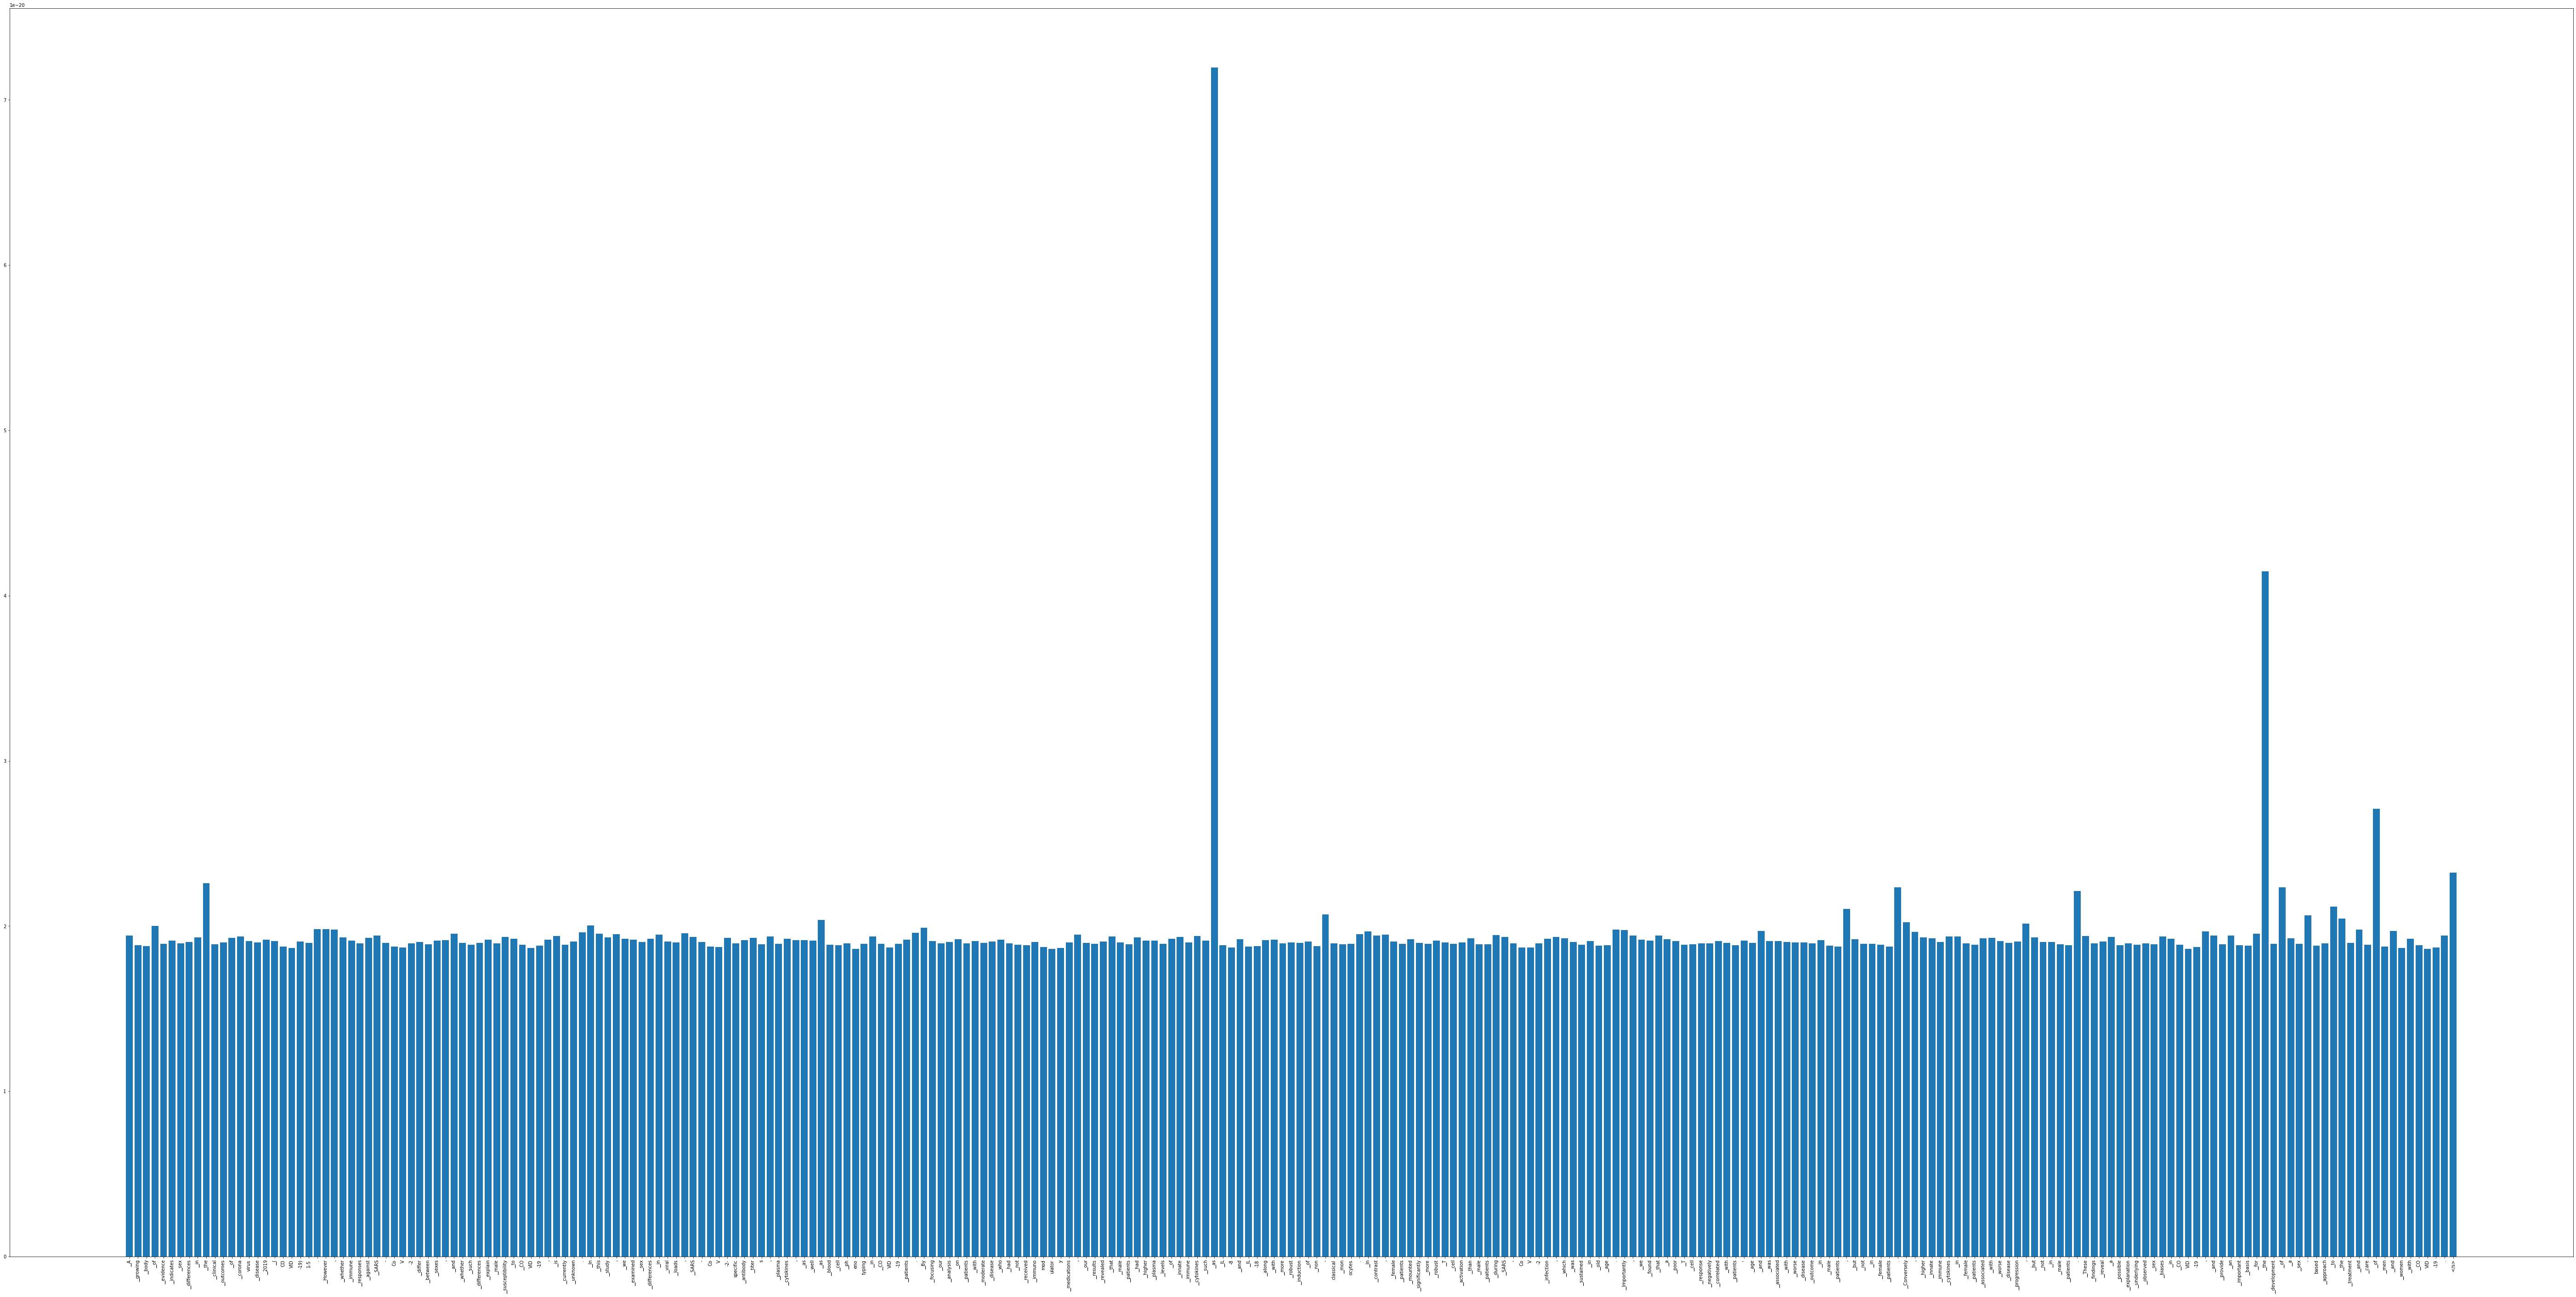

<Figure size 7200x3600 with 0 Axes>

In [453]:
plt.bar(range(len(total_prod)), total_prod)
plt.xticks(range(len(total_prod)), tokens, rotation=90)
plt.rcParams["figure.figsize"] = (100,50)
#plt.legend(, [i+1 for i in range(17)])
plt.show()
plt.clf()

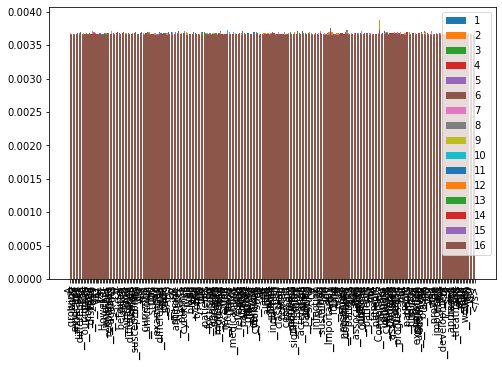

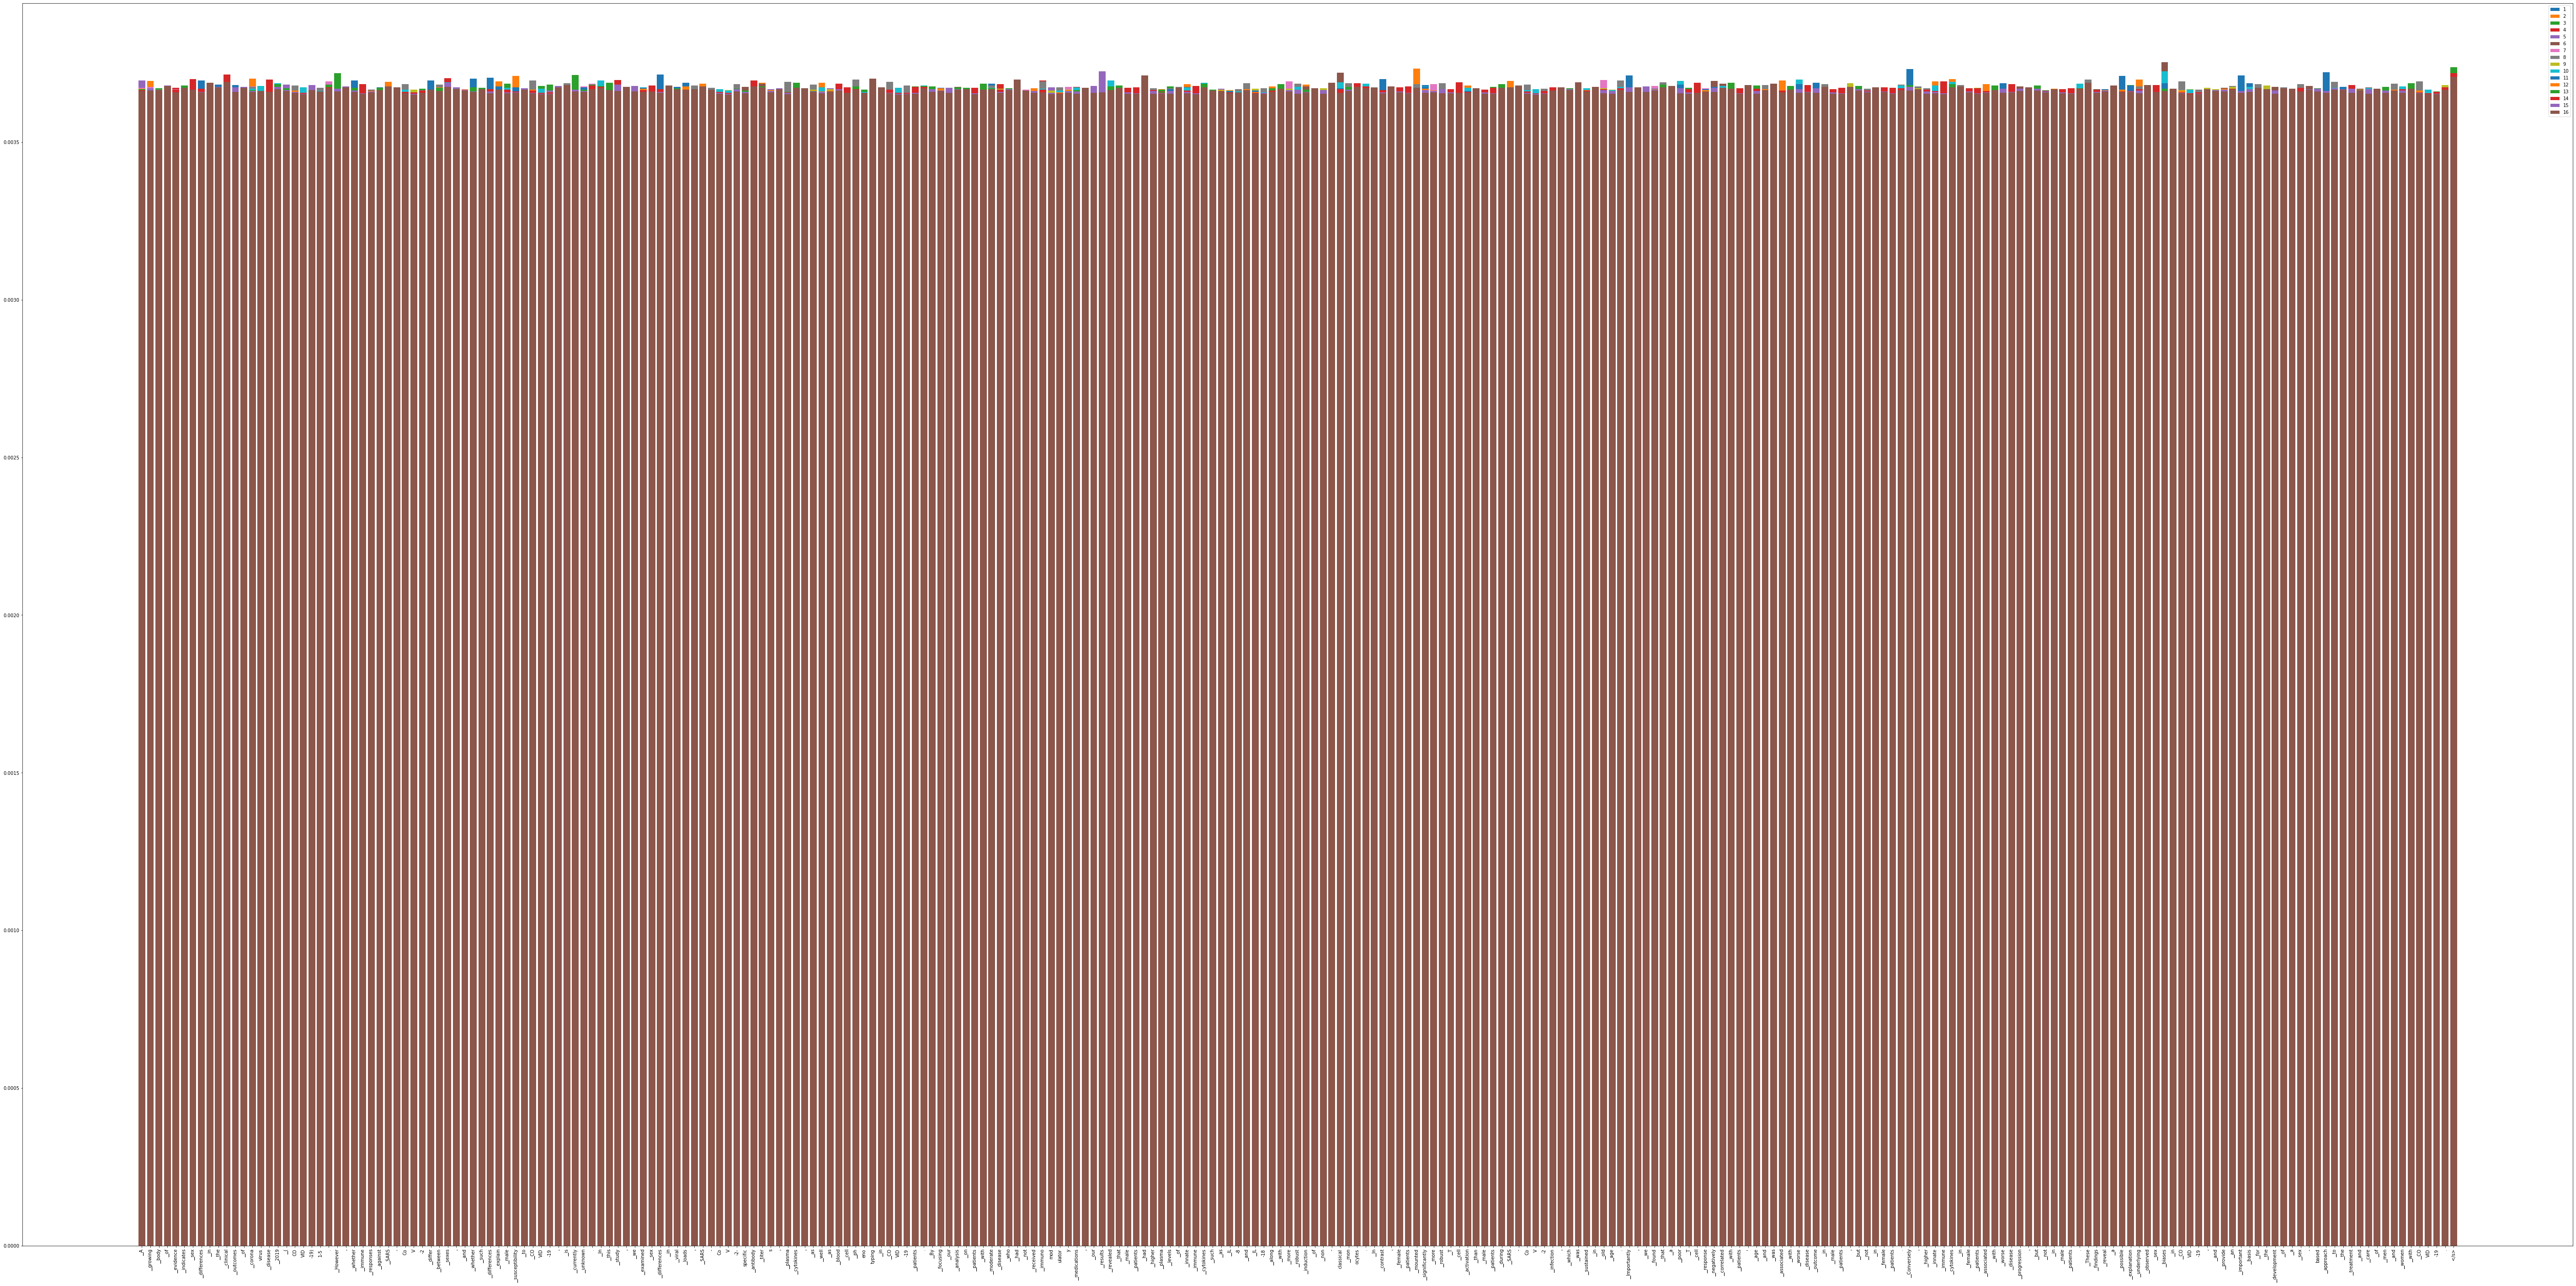

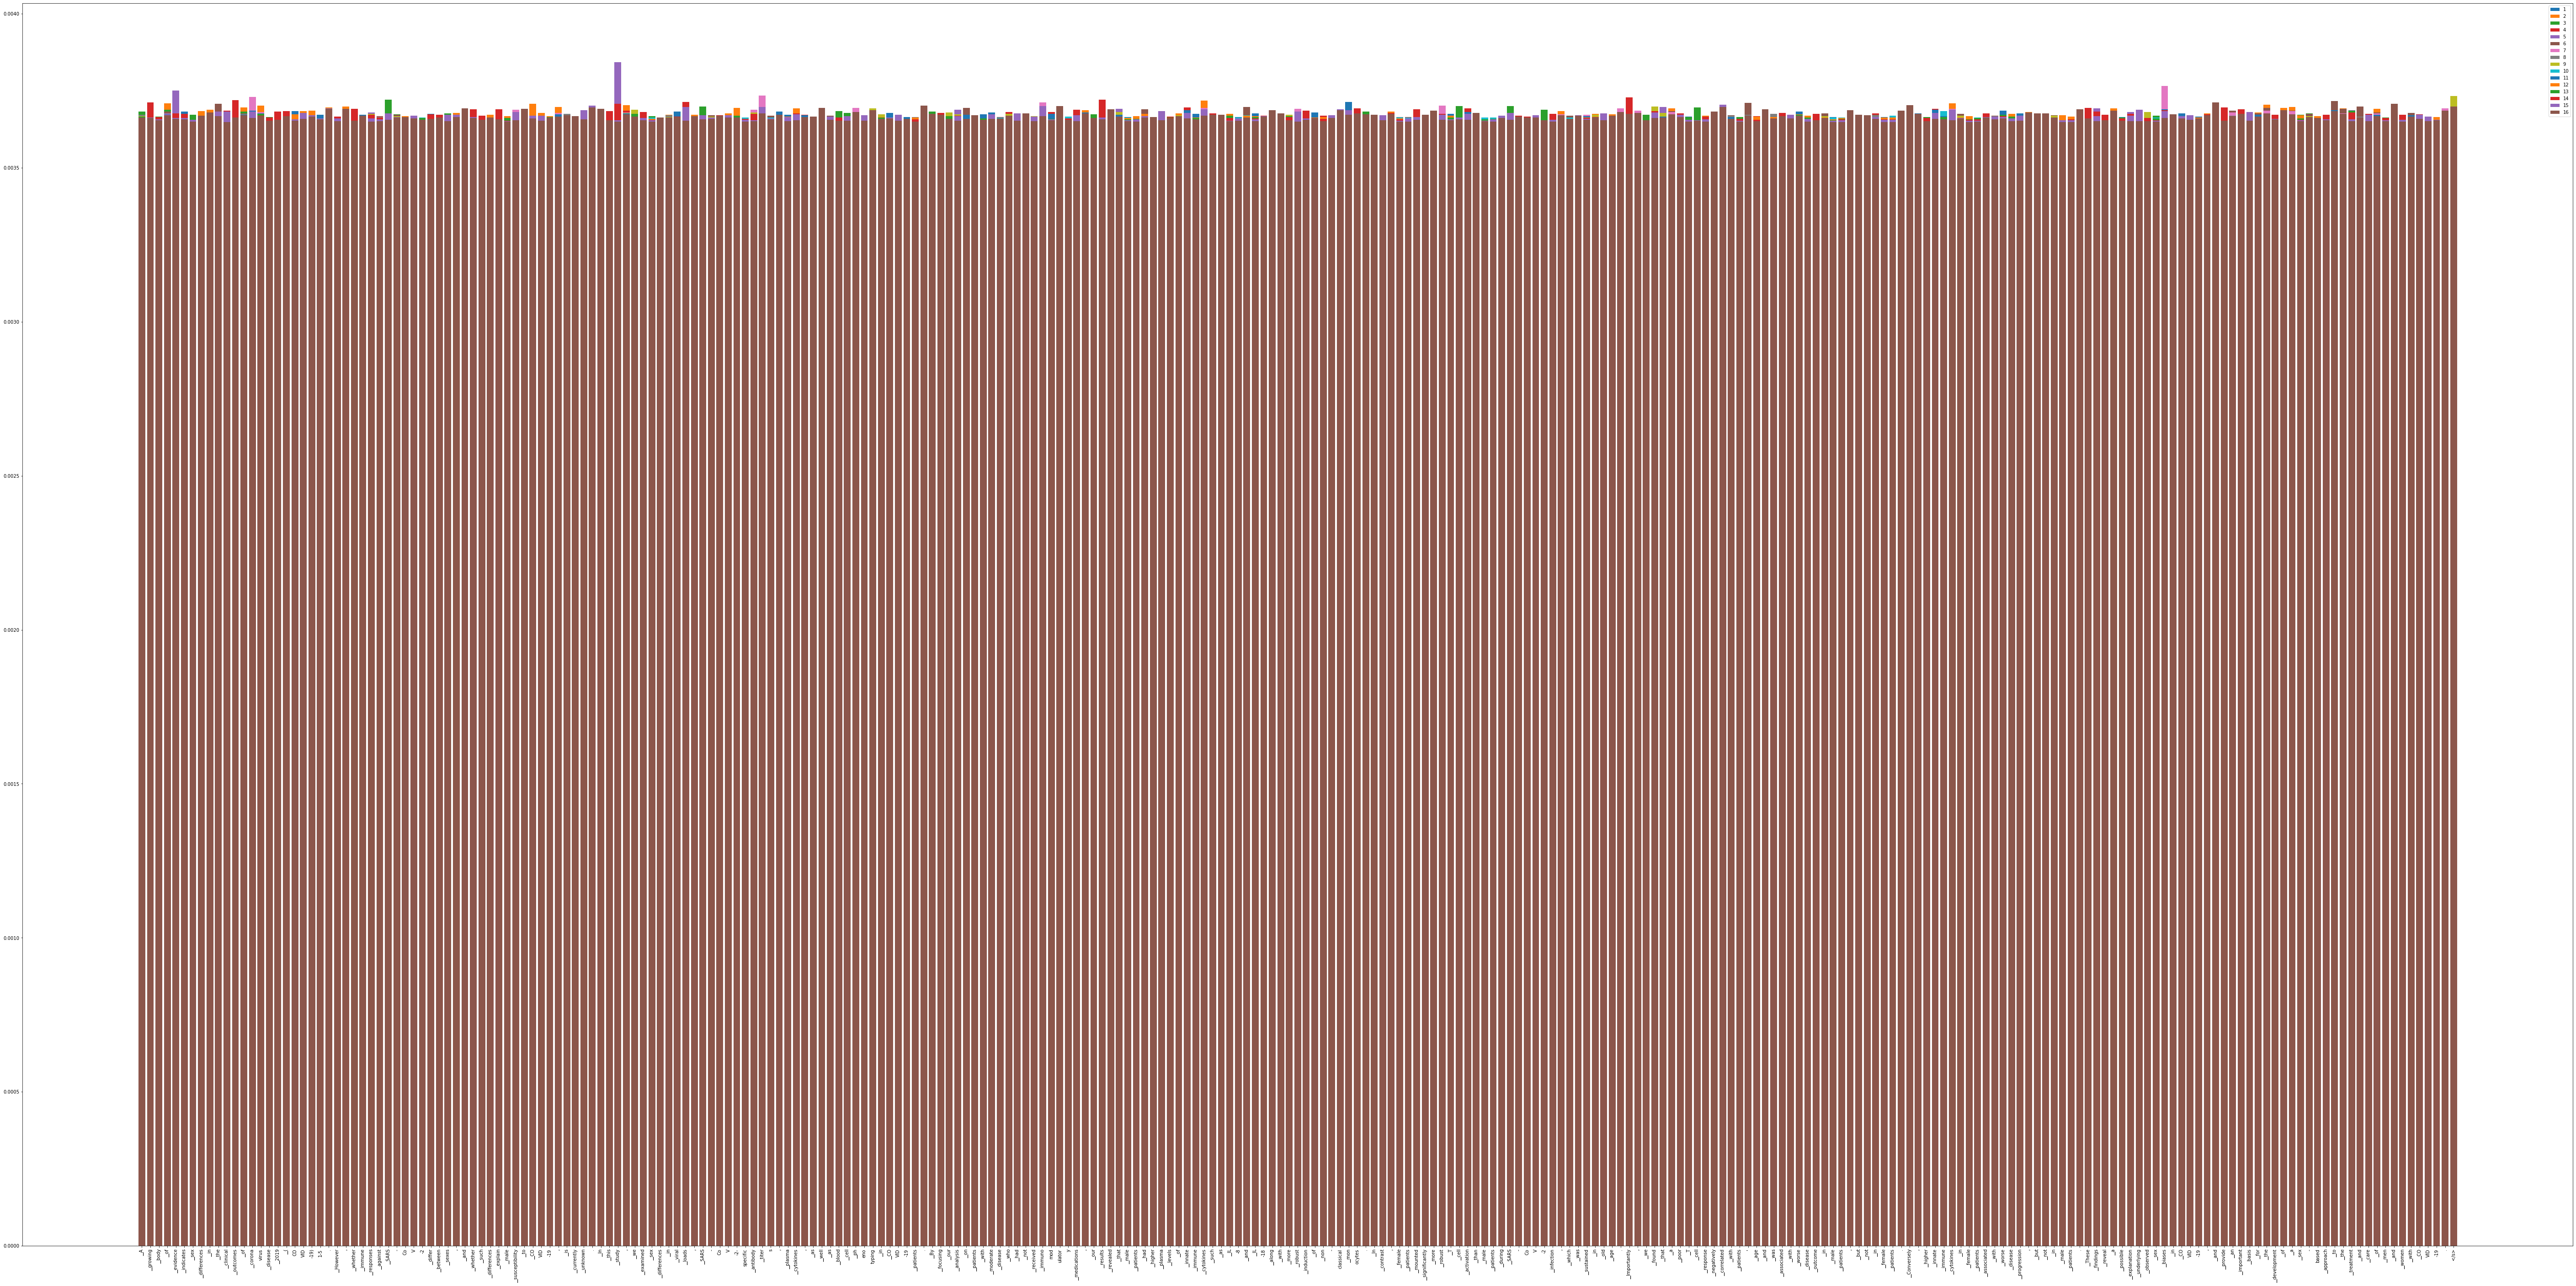

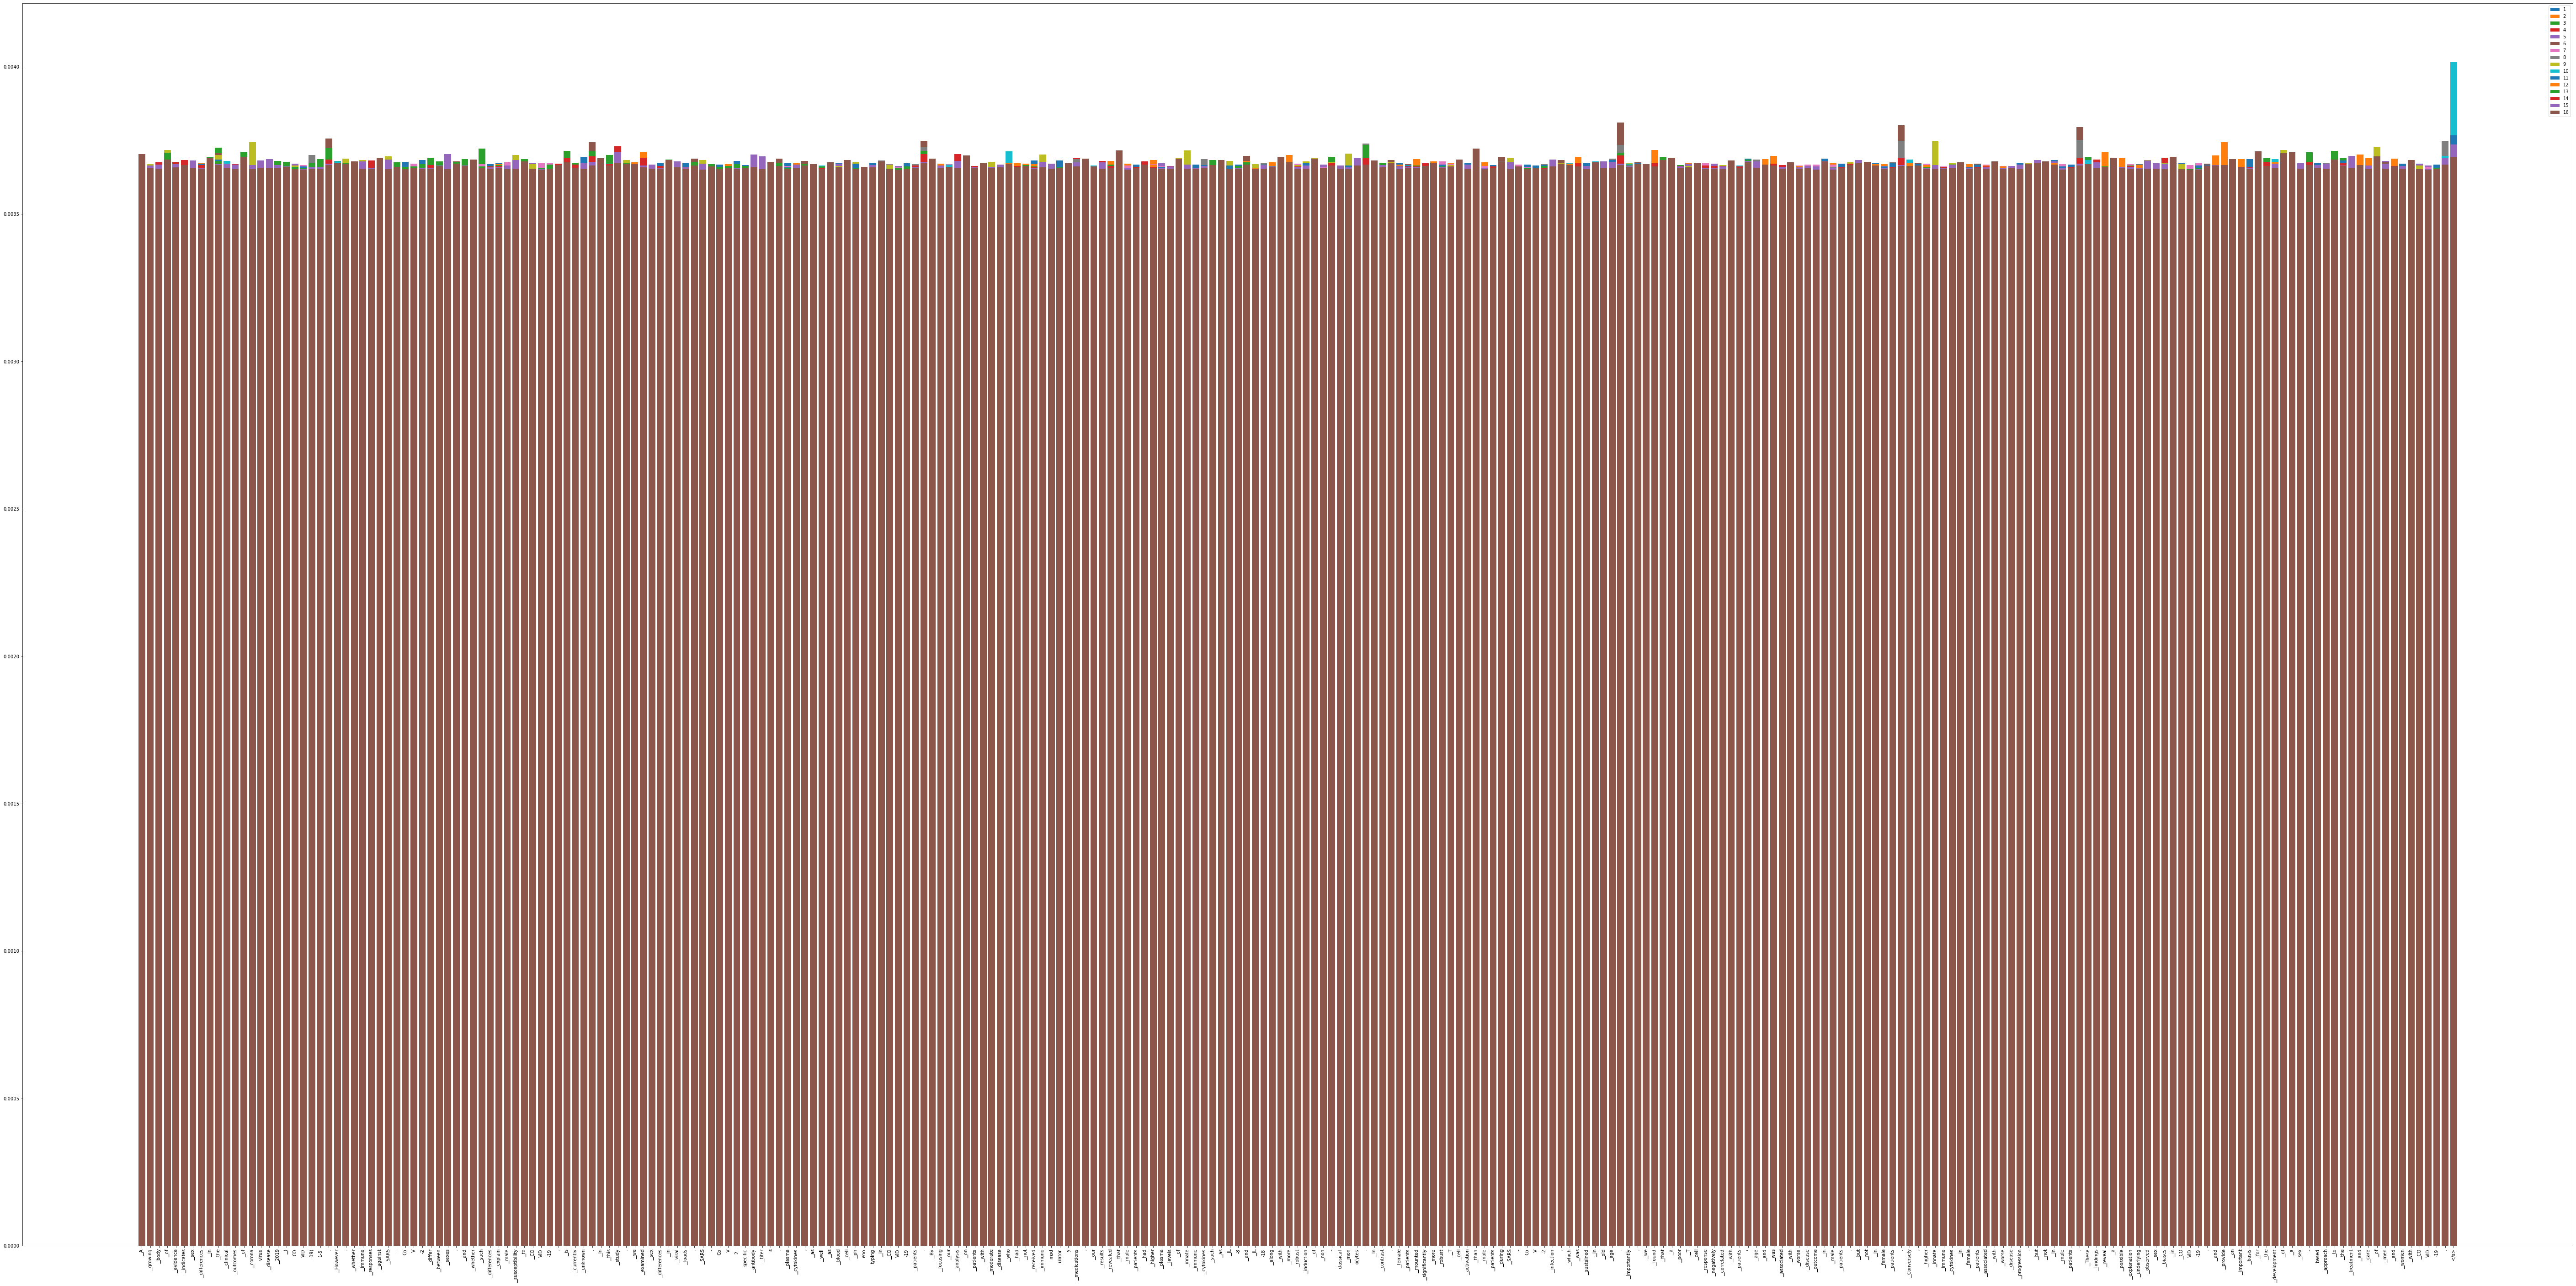

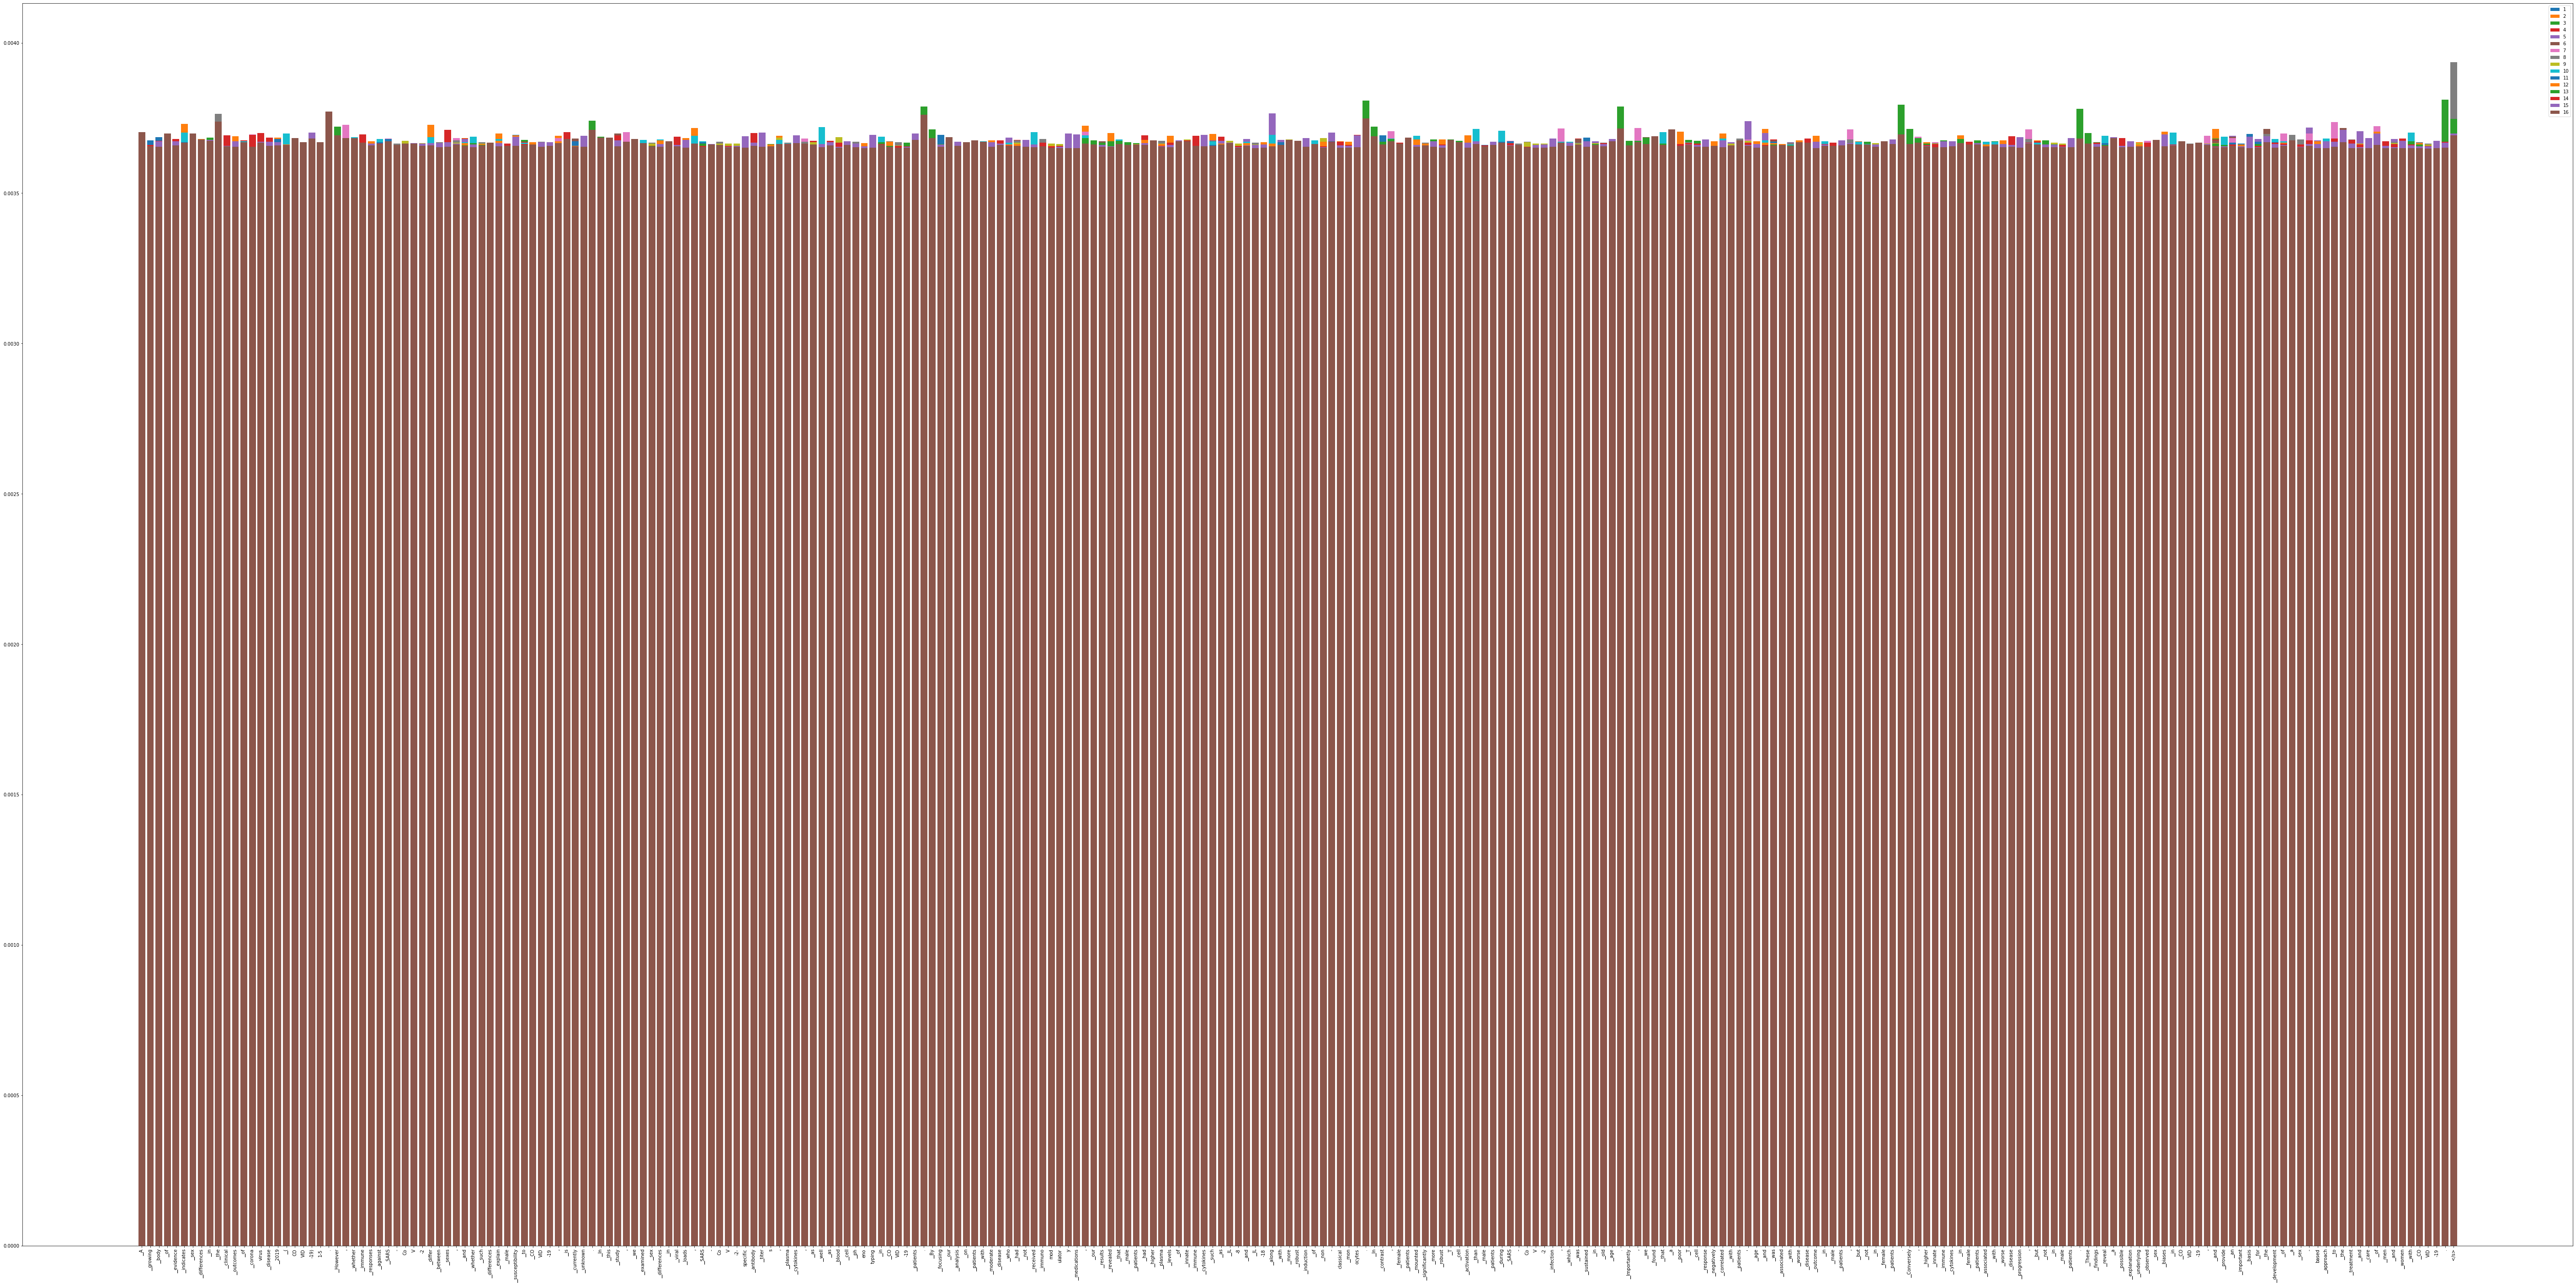

KeyboardInterrupt: 

In [467]:
for i in range(len(encoder_attentions[15][0][15])):
    plots = []
    for head in head_sums[i]:
        plots.append(plt.bar(range(len(head)), head))
    plt.xticks(range(len(head)), tokens, rotation=90)
    plt.rcParams["figure.figsize"] = (100,50)
    plt.legend([bar[0] for bar in plots], [i+1 for i in range(17)])
    plt.show()
    plt.clf()

In [216]:
encoder_attentions = translated[3]
encoder_attentions = [each.detach().numpy() for each in encoder_attentions]
print(translated[3][0][0][0].size())
print(encoder_attentions[0][0][0])
print(encoder_attentions[0][0][0][0])
print(type(encoder_attentions[0][0][0][0]))
print(encoder_attentions[0][0][0][0])

torch.Size([55, 55])
[[1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0000000e+00]
 [1.0016521e+09 2.8052662e+10 6.4187032e+07 ... 3.0298556e+10
  6.1385887e+09 1.2487025e+08]
 [1.0016521e+09 2.8052662e+10 6.4187032e+07 ... 3.0298556e+10
  6.1385887e+09 1.2487025e+08]
 ...
 [1.0016521e+09 2.8052662e+10 6.4187032e+07 ... 3.0298556e+10
  6.1385887e+09 1.2487025e+08]
 [1.0016521e+09 2.8052662e+10 6.4187032e+07 ... 3.0298556e+10
  6.1385887e+09 1.2487025e+08]
 [1.0016521e+09 2.8052662e+10 6.4187032e+07 ... 3.0298556e+10
  6.1385887e+09 1.2487025e+08]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
